# Exploratory Data Analysis (EDA) for Personality Dataset

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [6]:
df = pd.read_csv('personality_datasert.csv')

### Display basic information

In [7]:
print(df.info())
print("First 5 rows:")
print(df.head())
print("Descriptive statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None
First 5 rows:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes         

### Data Cleaning

In [8]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

# Check data types
print("Data types:")
print(df.dtypes)

Missing values per column:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64
Number of duplicates: 402
Data types:
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object


### Descriptive Statistics

In [9]:
# Numerical features summary
num_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
print("Numerical features summary:")
print(df[num_features].describe())

# Categorical features summary
cat_features = ['Stage_fear', 'Drained_after_socializing']
print("Categorical features value counts:")
for feature in cat_features:
    print(f"{feature}:")
    print(df[feature].value_counts())

Numerical features summary:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2900.000000              2900.000000    2900.000000   
mean           4.505816                 3.963354       3.000000   
std            3.441180                 2.872608       2.221597   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.963354       3.000000   
75%            7.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2900.000000     2900.000000  
mean              6.268863        3.564727  
std               4.232340        2.893587  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
max     

### Visualizations

##### Target Variable Distribution

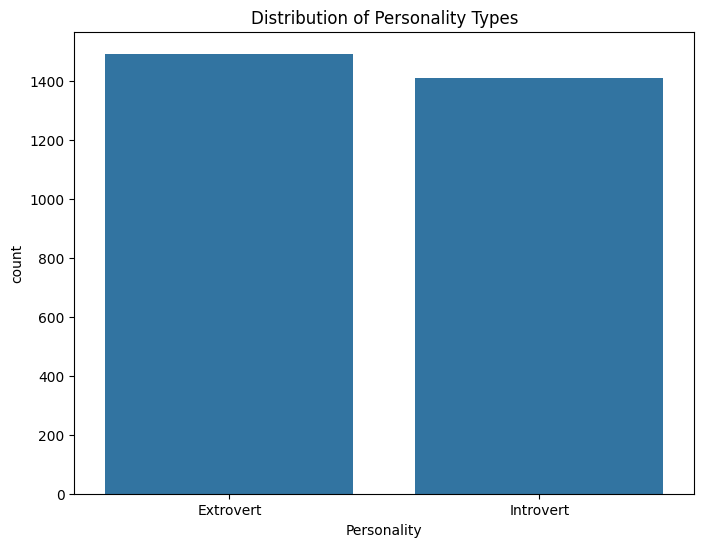

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='Personality', data=df)
plt.title('Distribution of Personality Types')
plt.show()

##### Numerical Features Distribution

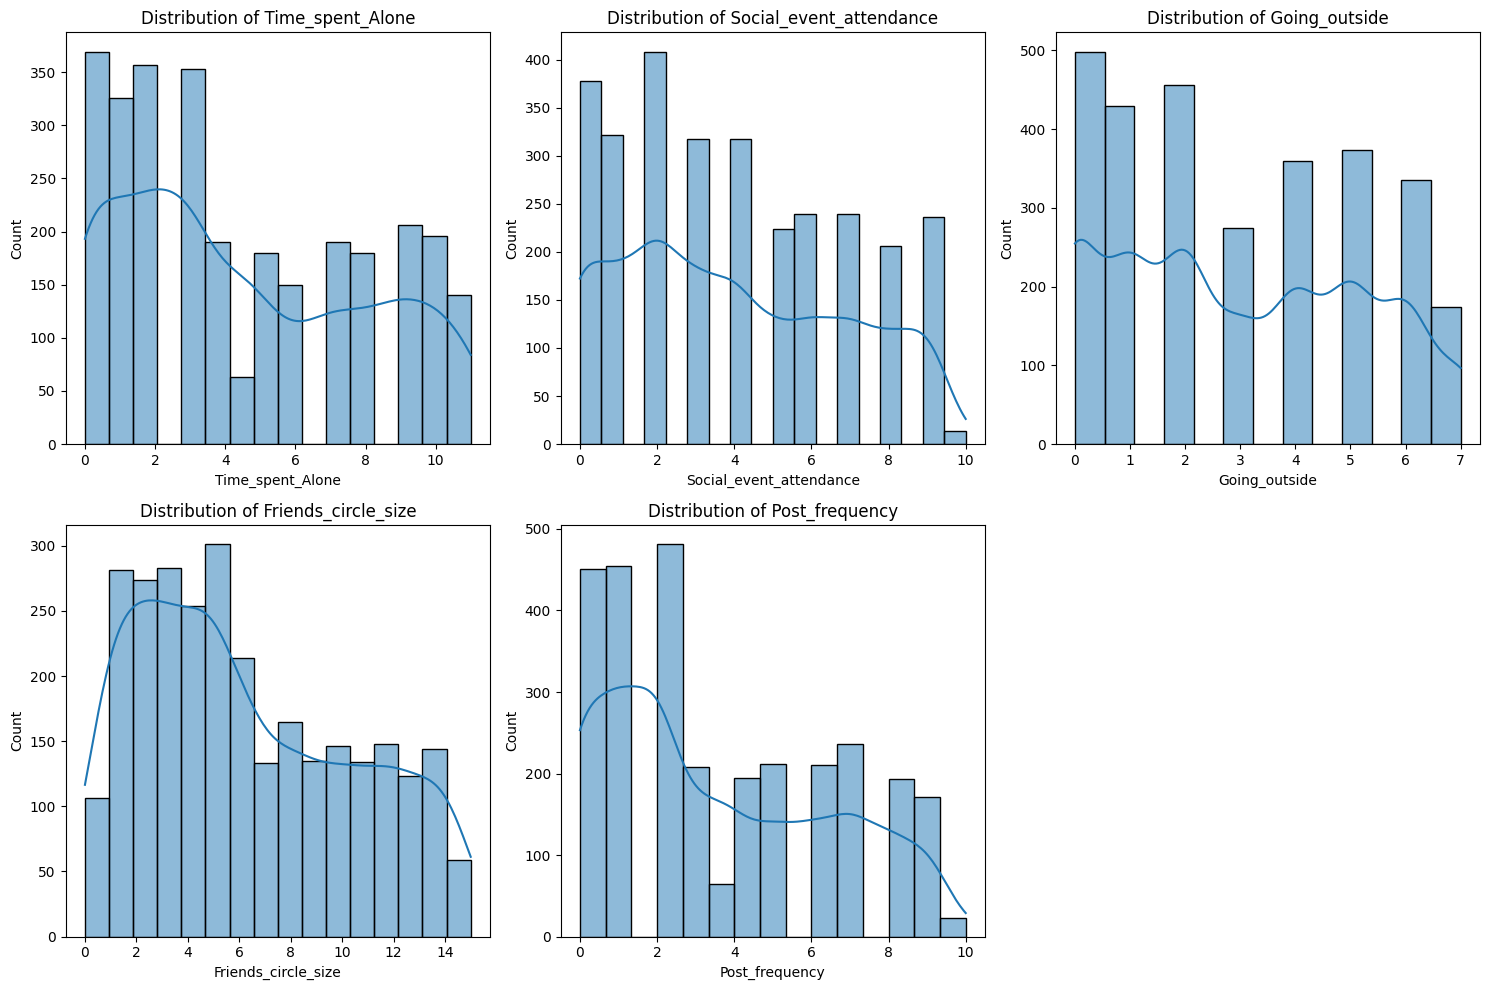

In [11]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

##### Categorical Features Distribution

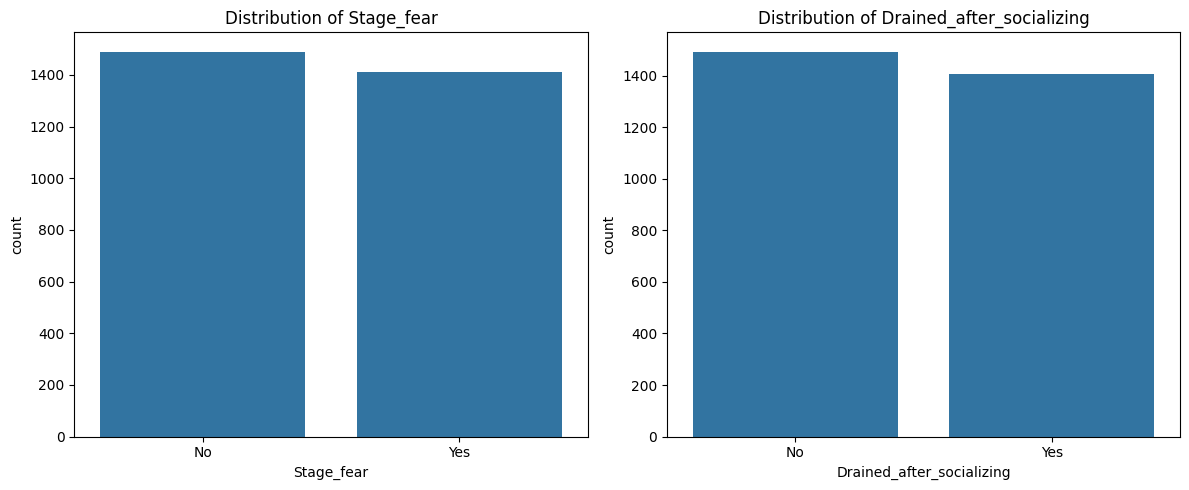

In [12]:
plt.figure(figsize=(12,5))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

##### Boxplots for Numerical Features by Personality

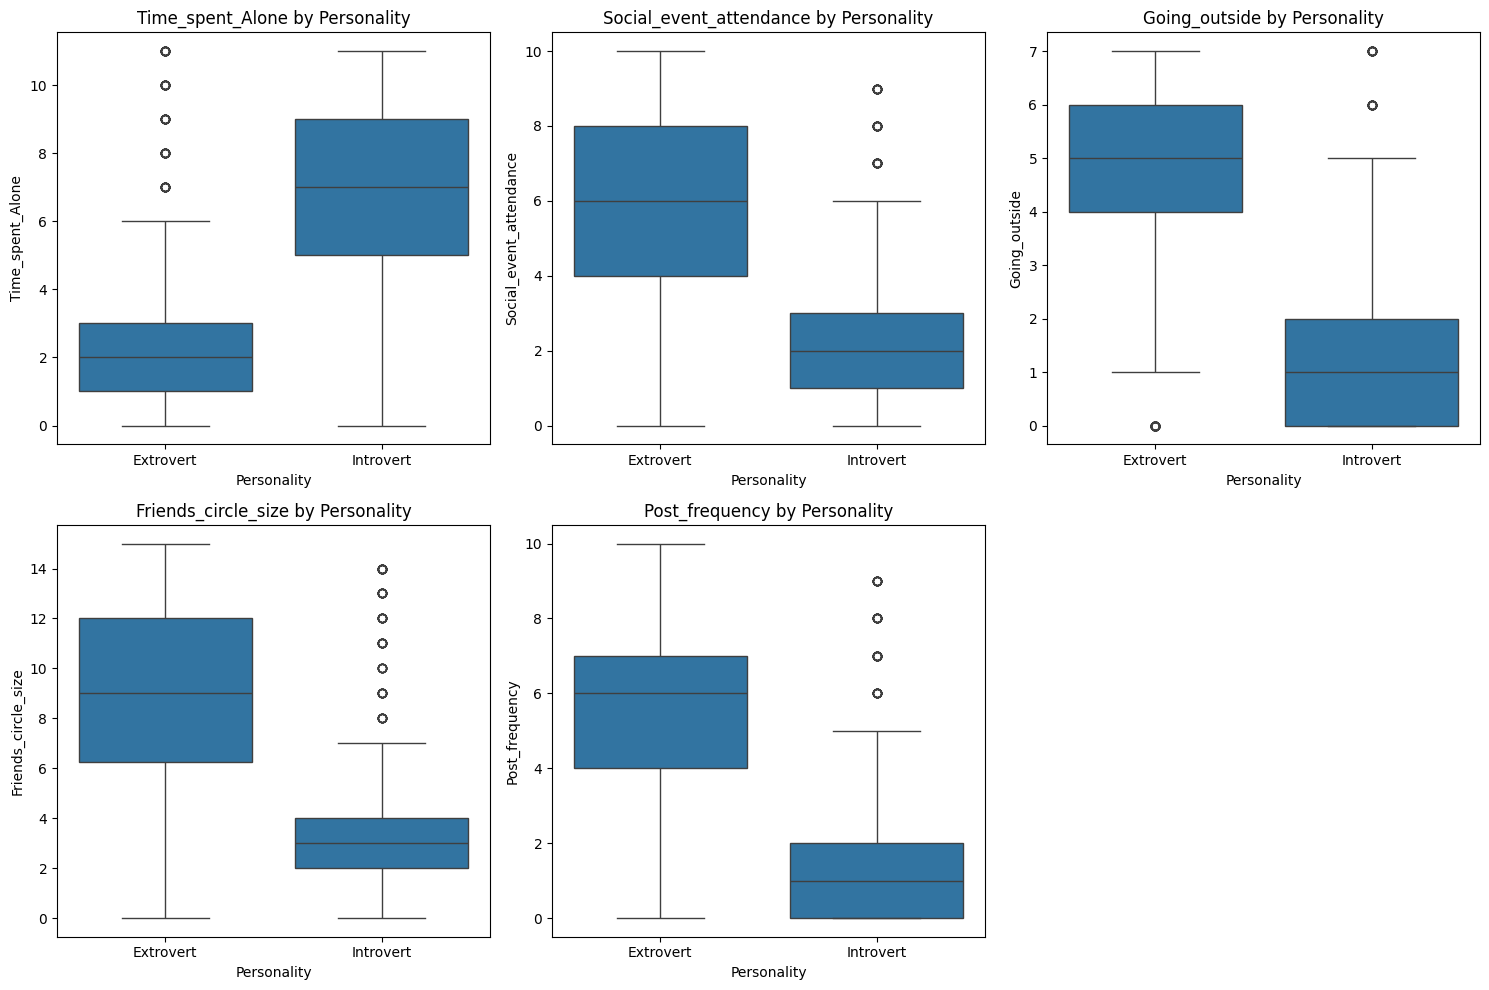

In [13]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Personality', y=feature, data=df)
    plt.title(f'{feature} by Personality')
plt.tight_layout()
plt.show()

##### Correlation Matrix

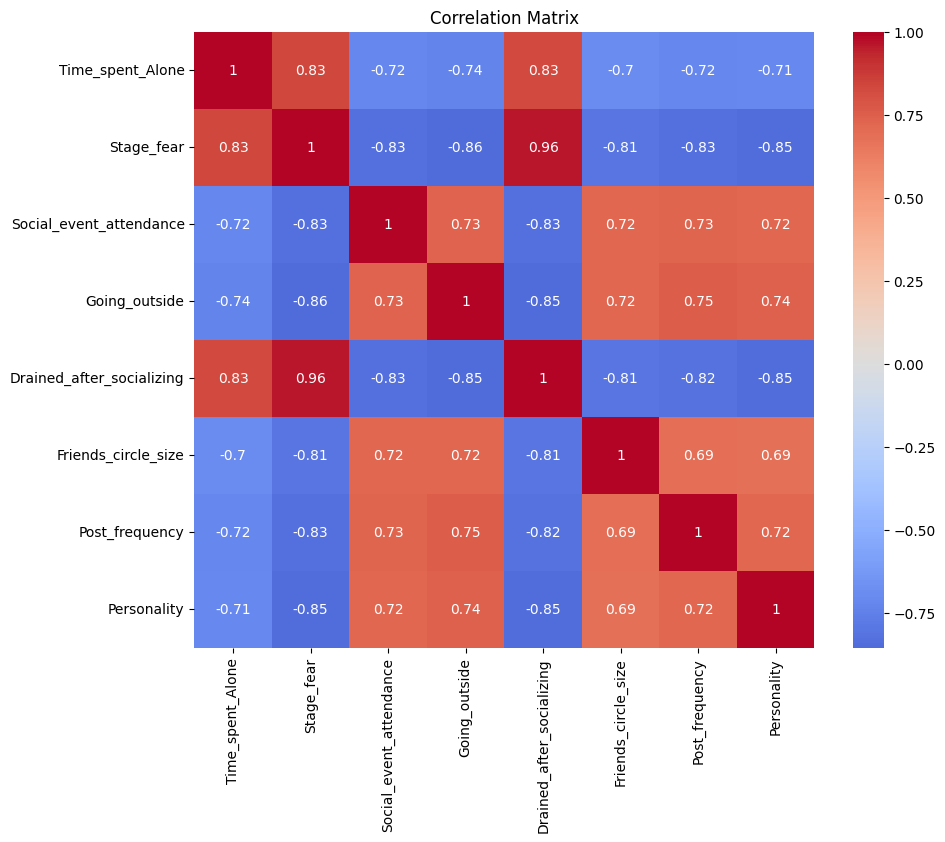

In [14]:
# Convert categorical features to numerical for correlation
df_corr = df.copy()
df_corr['Stage_fear'] = df_corr['Stage_fear'].map({'Yes': 1, 'No': 0})
df_corr['Drained_after_socializing'] = df_corr['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df_corr['Personality'] = df_corr['Personality'].map({'Introvert': 0, 'Extrovert': 1})

plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

##### Pairplot of Numerical Features

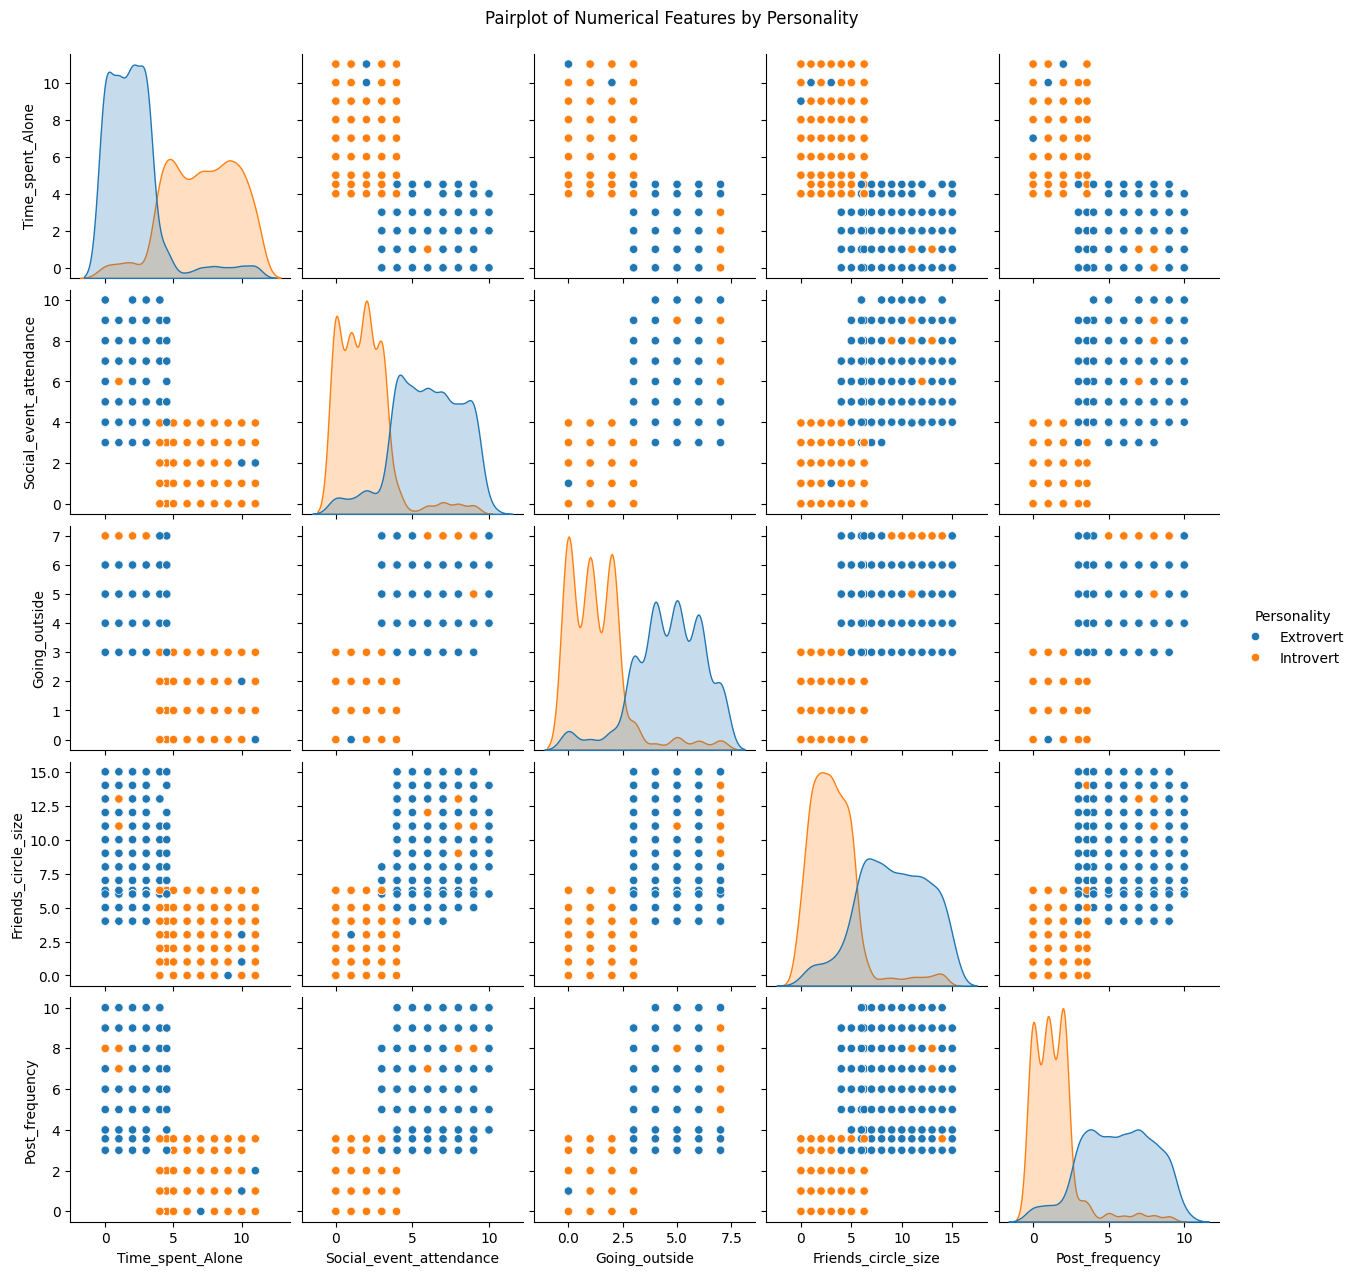

In [15]:
sns.pairplot(df[num_features + ['Personality']], hue='Personality')
plt.suptitle('Pairplot of Numerical Features by Personality', y=1.02)
plt.show()

##### Social Features vs Personality

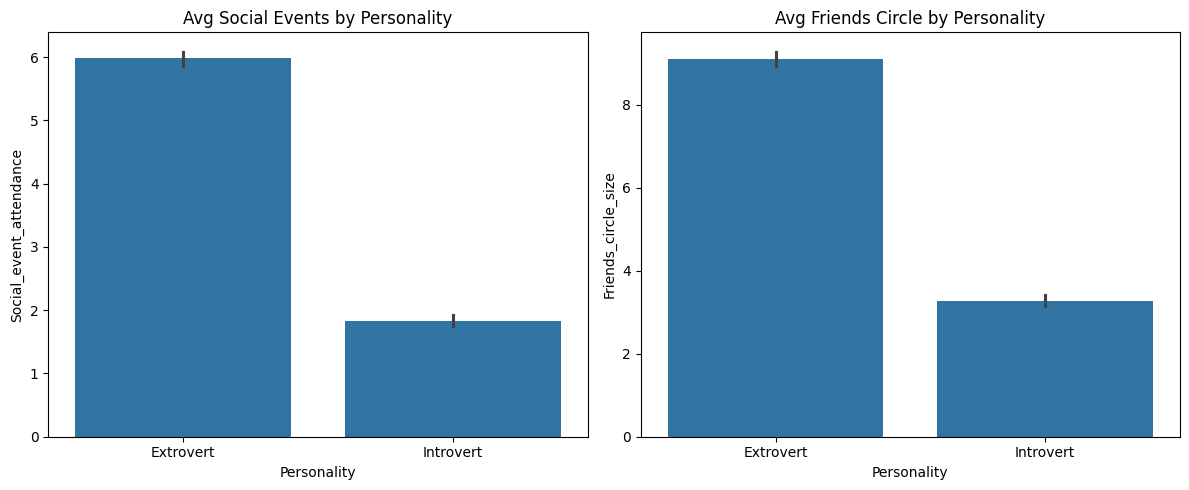

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Personality', y='Social_event_attendance', data=df)
plt.title('Avg Social Events by Personality')

plt.subplot(1,2,2)
sns.barplot(x='Personality', y='Friends_circle_size', data=df)
plt.title('Avg Friends Circle by Personality')
plt.tight_layout()
plt.show()

##### Time Spent Alone vs Personality

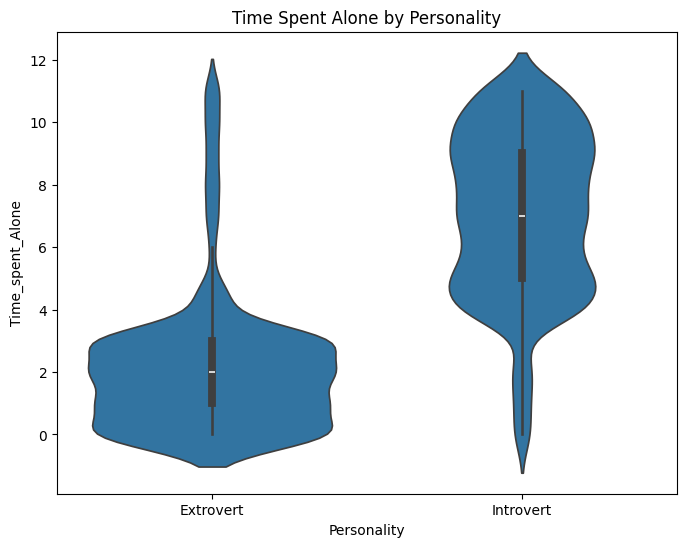

In [17]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Personality', y='Time_spent_Alone', data=df)
plt.title('Time Spent Alone by Personality')
plt.show()

### Outlier Detection

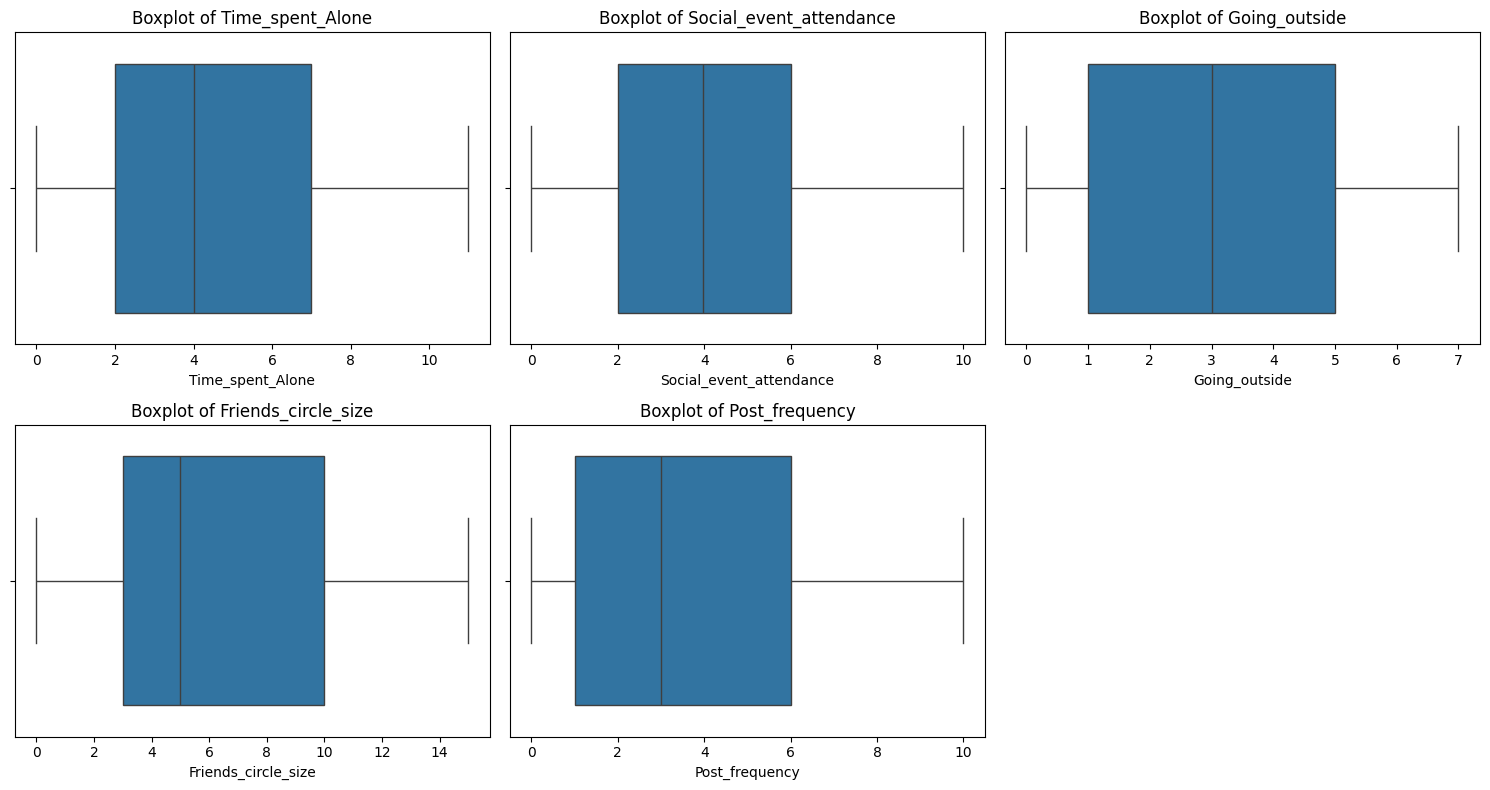

In [18]:
plt.figure(figsize=(15,8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### Feature Engineering Considerations

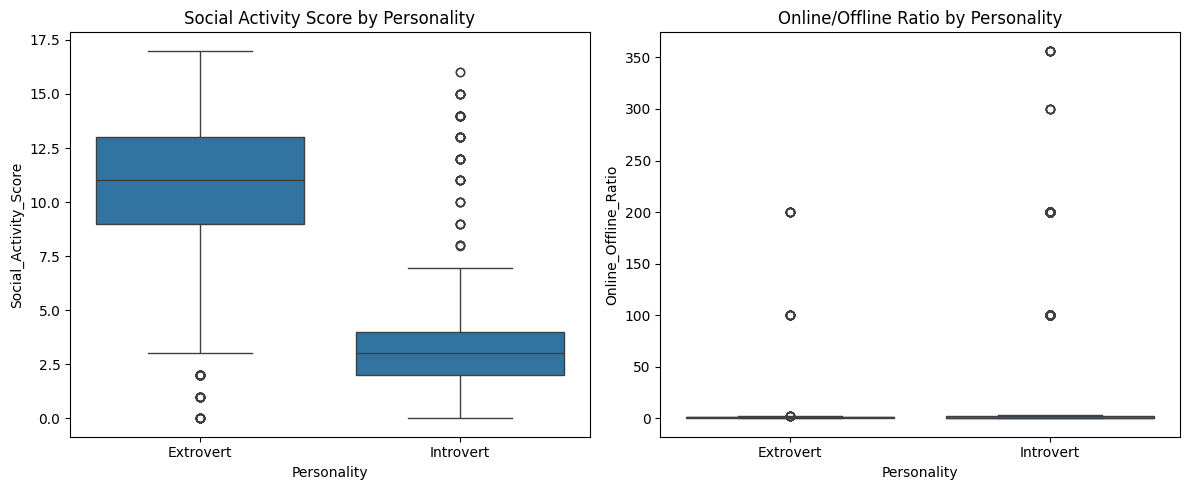

In [19]:
# Potential derived features
df['Social_Activity_Score'] = df['Social_event_attendance'] + df['Going_outside']
df['Online_Offline_Ratio'] = df['Post_frequency'] / (df['Social_event_attendance'] + 0.01)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='Personality', y='Social_Activity_Score', data=df)
plt.title('Social Activity Score by Personality')

plt.subplot(1,2,2)
sns.boxplot(x='Personality', y='Online_Offline_Ratio', data=df)
plt.title('Online/Offline Ratio by Personality')
plt.tight_layout()
plt.show()